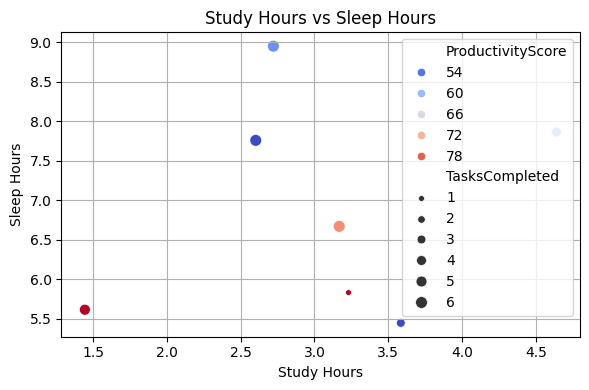

C:\Users\chandan kumar\AppData\Local\Temp\ipykernel_15368\3841191822.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Date', y='TasksCompleted', palette='Greens_d')


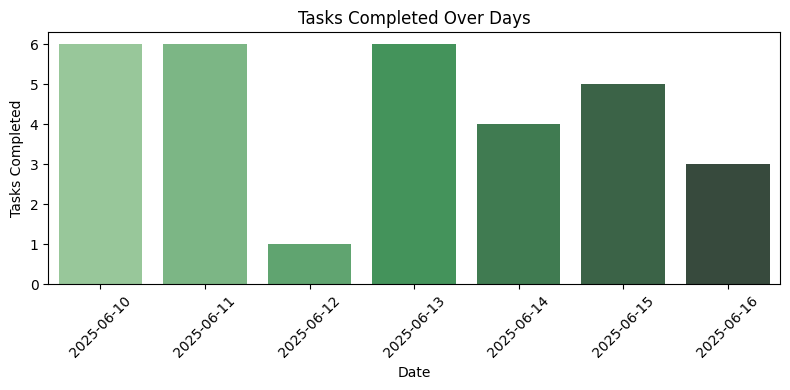

In [2]:
# STEP 1: Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os

# STEP 2: Ensure folders exist
os.makedirs("data", exist_ok=True)
os.makedirs("visuals", exist_ok=True)

# STEP 3: Load your dataset (Make sure the CSV is in the 'data' folder)
csv_path = os.path.join("data", "student_daily_data.csv")
if not os.path.exists(csv_path):
    # Create a sample DataFrame if the file does not exist
    import numpy as np
    import datetime
    dates = pd.date_range(datetime.date.today(), periods=7).strftime('%Y-%m-%d')
    df = pd.DataFrame({
        'Date': dates,
        'StudyHours': np.random.uniform(1, 6, size=7),
        'SleepHours': np.random.uniform(5, 9, size=7),
        'ProductivityScore': np.random.randint(50, 100, size=7),
        'TasksCompleted': np.random.randint(1, 8, size=7),
        'ScreenTime': np.random.uniform(2, 8, size=7)
    })
    df.to_csv(csv_path, index=False)
else:
    df = pd.read_csv(csv_path)

# STEP 4: Scatter Plot - Study Hours vs Sleep Hours
plt.figure(figsize=(6, 4))
sns.scatterplot(
    data=df,
    x='StudyHours',
    y='SleepHours',
    hue='ProductivityScore',
    size='TasksCompleted',
    palette='coolwarm',
    legend='brief'
)
plt.title("Study Hours vs Sleep Hours")
plt.xlabel("Study Hours")
plt.ylabel("Sleep Hours")
plt.grid(True)
plt.tight_layout()
plt.savefig("visuals/study_sleep_correlation.png")
plt.show()

# STEP 5: Bar Chart - Tasks Completed Per Day
plt.figure(figsize=(8, 4))
sns.barplot(data=df, x='Date', y='TasksCompleted', palette='Greens_d')
plt.title("Tasks Completed Over Days")
plt.xlabel("Date")
plt.ylabel("Tasks Completed")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("visuals/task_completion_bar.png")
plt.show()

# STEP 6: Interactive Line Chart - Productivity Over Time
fig = px.line(
    df,
    x='Date',
    y='ProductivityScore',
    title="Daily Productivity Score",
    hover_data=['StudyHours', 'SleepHours', 'ScreenTime'],
    markers=True
)
fig.update_traces(line_color='blue')
fig.write_html("visuals/productivity_trends.html")
fig.show()
